In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
file_bookings = "Documents/bookings.csv.bz2"
file_searches = "Documents/searches.csv.bz2"

In [3]:
from datetime import datetime
data_searches = pd.read_csv(file_searches, sep="\^|,", compression="bz2", chunksize=100000, engine='python')

In [4]:
def get_dataframe(data_reader):
    i = 0
    grouped_chunks = list()
    for chunk in data_reader:
        i += 1
        print('.'),
        chunk['Month'] = map(lambda x: (datetime.strptime(x,'%Y-%m-%d')).month, chunk['Date'])
        p = chunk.loc[(chunk.Destination == 'MAD') | (chunk.Destination == 'BCN') | (chunk.Destination == 'AGP')]
        grouped_chunks.append(p.groupby(['Destination', 'Month'], as_index=False).size())
    chunk_concat = pd.concat(grouped_chunks)
    f = pd.DataFrame(chunk_concat)
    f.columns = ['size']
    f.reset_index(level=0, inplace=True)
    f.reset_index(level=0, inplace=True)
    result = f.groupby(['Destination', 'Month'], as_index=False).sum()
    return result

In [5]:
result = get_dataframe(data_searches)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [6]:
print result

   Destination  Month   size
0          AGP      1   9633
1          AGP      2   8379
2          AGP      3  10659
3          AGP      4   8265
4          AGP      5  10830
5          AGP      6   7923
6          AGP      7   8892
7          AGP      8   7866
8          AGP      9   8151
9          AGP     10   6499
10         AGP     11   6384
11         AGP     12   3696
12         BCN      1  29469
13         BCN      2  28329
14         BCN      3  30552
15         BCN      4  31236
16         BCN      5  28728
17         BCN      6  26505
18         BCN      7  29241
19         BCN      8  27075
20         BCN      9  23427
21         BCN     10  20276
22         BCN     11  19824
23         BCN     12  15400
24         MAD      1  24258
25         MAD      2  22800
26         MAD      3  24681
27         MAD      4  25251
28         MAD      5  26334
29         MAD      6  22800
30         MAD      7  22971
31         MAD      8  21831
32         MAD      9  21147
33         MAD

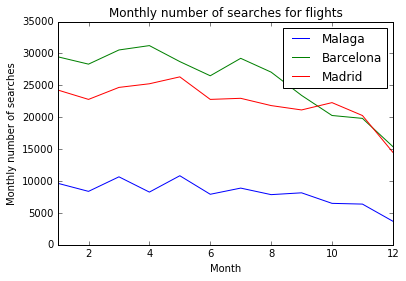

In [8]:
%matplotlib inline
labels_iata = ['Malaga','Barcelona','Madrid']
ax = result.loc[result.Destination == 'AGP'].plot(x='Month')
result.loc[result.Destination == 'BCN'].plot(x='Month', ax=ax)
result.loc[result.Destination == 'MAD'].plot(x='Month',ax=ax)
plt.title('Monthly number of searches for flights')
ax.legend(labels_iata)
ax.set_ylabel("Monthly number of searches")